# Barnett's experiment symbolic simulation for single-photon pure polarization states

## Context

In this notebook we symbolically compute unitary evolution associated to Barnett's experiment (https://doi.org/10.1080/09500349708230718) for minimum-error discrimination of single-photon polarization states. For this purpose we use the *sympy* package. We test multiple single-photon states at the original input and also different parameters for the optical elements.

In the end, we perform a brief parameter analysis in order to find the minimum fidelity between the output photon distributions for boxes A and B such that we are able to discriminate them.

## Output

- Symbolic output photon states
- Symbolic output photon distributions
- Symbolic fidelity between the distributions of boxes A and B

In [1]:
from sympy import *

In [130]:
var("s1 s2 s3 s4")
var("a1 a2 a3", real=True)

# lower case for 2x2 matrices, upper case for 6x6 matrices

alpha = pi/8 # half angle between the states
opt_a2 = asin(tan(alpha))/2

S0 = Matrix([s1,s2,s3,s4]) # initial state vector
idd = eye(2)
IDD = eye(4)
zero = idd*0
qwp1 = Matrix([[1,0],[0,-I]])
hwp1 = Matrix([[cos(2*a1),sin(2*a1)],[sin(2*a1),-cos(2*a1)]]).subs(a1,alpha/2)
hwp2 = Matrix([[cos(2*a2),sin(2*a2)],[sin(2*a2),-cos(2*a2)]])#.subs(a2,opt_a2)
hwp3 = Matrix([[cos(2*a3),sin(2*a3)],[sin(2*a3),-cos(2*a3)]]).subs(a3,pi/4)

In [131]:
# wave plates
QWP1 = Matrix(BlockMatrix([[qwp1,zero],[zero,idd]]))
HWP1 = Matrix(BlockMatrix([[hwp1,zero],[zero,idd]]))
HWP2 = Matrix(BlockMatrix([[hwp2,zero],[zero,idd]]))
HWP3 = Matrix(BlockMatrix([[idd,zero],[zero,hwp3]]))

# polarizing beam splitter
PBS = IDD.copy()
PBS[1,1] = PBS[3,3] = 0
PBS[1,3] = PBS[3,1] = 1

In [132]:
S1 = HWP1.multiply(QWP1.multiply(S0))
S1

Matrix([
[s1*sqrt(sqrt(2)/4 + 1/2) - I*s2*sqrt(1/2 - sqrt(2)/4)],
[s1*sqrt(1/2 - sqrt(2)/4) + I*s2*sqrt(sqrt(2)/4 + 1/2)],
[                                                   s3],
[                                                   s4]])

In [133]:
S2 = PBS.multiply(S1)
S2

Matrix([
[s1*sqrt(sqrt(2)/4 + 1/2) - I*s2*sqrt(1/2 - sqrt(2)/4)],
[                                                   s4],
[                                                   s3],
[s1*sqrt(1/2 - sqrt(2)/4) + I*s2*sqrt(sqrt(2)/4 + 1/2)]])

In [134]:
S3 = PBS.multiply(HWP3.multiply(HWP2.multiply(S2)))
S3

Matrix([
[ s4*sin(2*a2) + (s1*sqrt(sqrt(2)/4 + 1/2) - I*s2*sqrt(1/2 - sqrt(2)/4))*cos(2*a2)],
[                                                                               s3],
[                            s1*sqrt(1/2 - sqrt(2)/4) + I*s2*sqrt(sqrt(2)/4 + 1/2)],
[-s4*cos(2*a2) + (s1*sqrt(sqrt(2)/4 + 1/2) - I*s2*sqrt(1/2 - sqrt(2)/4))*sin(2*a2)]])

# Introducing a photon in the second port

In [135]:
var("theta", real=True)

S_test = S3.subs([(s3,cos(theta)),(s4,sin(theta))]) # introducing a photon in the second port
S_test

Matrix([
[(s1*sqrt(sqrt(2)/4 + 1/2) - I*s2*sqrt(1/2 - sqrt(2)/4))*cos(2*a2) + sin(2*a2)*sin(theta)],
[                                                                              cos(theta)],
[                                   s1*sqrt(1/2 - sqrt(2)/4) + I*s2*sqrt(sqrt(2)/4 + 1/2)],
[(s1*sqrt(sqrt(2)/4 + 1/2) - I*s2*sqrt(1/2 - sqrt(2)/4))*sin(2*a2) - sin(theta)*cos(2*a2)]])

In [136]:
SH = S_test.subs([(s1,1),(s2,0)]) # Horizontal photon
simplify(SH)

Matrix([
[sin(2*a2)*sin(theta) + sqrt(sqrt(2) + 2)*cos(2*a2)/2],
[                                          cos(theta)],
[                                 sqrt(2 - sqrt(2))/2],
[sqrt(sqrt(2) + 2)*sin(2*a2)/2 - sin(theta)*cos(2*a2)]])

In [137]:
SV = S_test.subs([(s1,0),(s2,1)]) # Vertical photon
simplify(SV)

Matrix([
[  sin(2*a2)*sin(theta) - sqrt(-2 + sqrt(2))*cos(2*a2)/2],
[                                             cos(theta)],
[                                   sqrt(-2 - sqrt(2))/2],
[-I*sqrt(2 - sqrt(2))*sin(2*a2)/2 - sin(theta)*cos(2*a2)]])

In [138]:
SL = S_test.subs([(s1,1/sqrt(2)),(s2,I/sqrt(2))]) # Left circular photon
simplify(SL)

Matrix([
[sin(2*a2)*sin(theta) + sqrt(2)*(sqrt(2 - sqrt(2)) + sqrt(sqrt(2) + 2))*cos(2*a2)/4],
[                                                                        cos(theta)],
[                                sqrt(2)*(-sqrt(sqrt(2) + 2) + sqrt(2 - sqrt(2)))/4],
[sqrt(2)*(sqrt(2 - sqrt(2)) + sqrt(sqrt(2) + 2))*sin(2*a2)/4 - sin(theta)*cos(2*a2)]])

In [139]:
SR = S_test.subs([(s1,1/sqrt(2)),(s2,-I/sqrt(2))]) # Right circular photon
simplify(SR)

Matrix([
[ sin(2*a2)*sin(theta) - sqrt(2)*(-sqrt(sqrt(2) + 2) + sqrt(2 - sqrt(2)))*cos(2*a2)/4],
[                                                                          cos(theta)],
[                                   sqrt(2)*(sqrt(2 - sqrt(2)) + sqrt(sqrt(2) + 2))/4],
[-sqrt(2)*(-sqrt(sqrt(2) + 2) + sqrt(2 - sqrt(2)))*sin(2*a2)/4 - sin(theta)*cos(2*a2)]])

In [140]:
PH = SH.multiply_elementwise(conjugate(SH))
PV = SV.multiply_elementwise(conjugate(SV))
PA = simplify(re(PH+PV)/2)
PA

Matrix([
[ sqrt(sqrt(2) + 2)*(cos(4*a2 - theta) - cos(4*a2 + theta))/8 + sin(2*a2)**2*sin(theta)**2 + cos(2*a2)**2/2],
[                                                                                             cos(theta)**2],
[                                                                                                       1/2],
[-sqrt(sqrt(2) + 2)*(cos(4*a2 - theta) - cos(4*a2 + theta))/8 + sin(2*a2)**2/2 + sin(theta)**2*cos(2*a2)**2]])

In [141]:
PL = SL.multiply_elementwise(conjugate(SL))
PR = SR.multiply_elementwise(conjugate(SR))
PB = simplify(re(PL+PR)/2)
PB

Matrix([
[ sqrt(2*sqrt(2) + 4)*(cos(4*a2 - theta)/8 - cos(4*a2 + theta)/8) + sin(2*a2)**2*sin(theta)**2 + cos(2*a2)**2/2],
[                                                                                                 cos(theta)**2],
[                                                                                                           1/2],
[sqrt(2*sqrt(2) + 4)*(-cos(4*a2 - theta)/8 + cos(4*a2 + theta)/8) + sin(2*a2)**2/2 + sin(theta)**2*cos(2*a2)**2]])

In [142]:
# Fidelity between the two distributions
# Minimizing the fidelity allows for a better discrimination
F = 0
for i in range(4):
    F += sqrt(PA[i]*PB[i])
F

sqrt((-sqrt(sqrt(2) + 2)*(cos(4*a2 - theta) - cos(4*a2 + theta))/8 + sin(2*a2)**2/2 + sin(theta)**2*cos(2*a2)**2)*(sqrt(2*sqrt(2) + 4)*(-cos(4*a2 - theta)/8 + cos(4*a2 + theta)/8) + sin(2*a2)**2/2 + sin(theta)**2*cos(2*a2)**2)) + sqrt((sqrt(sqrt(2) + 2)*(cos(4*a2 - theta) - cos(4*a2 + theta))/8 + sin(2*a2)**2*sin(theta)**2 + cos(2*a2)**2/2)*(sqrt(2*sqrt(2) + 4)*(cos(4*a2 - theta)/8 - cos(4*a2 + theta)/8) + sin(2*a2)**2*sin(theta)**2 + cos(2*a2)**2/2)) + cos(theta)**2 + 1/2

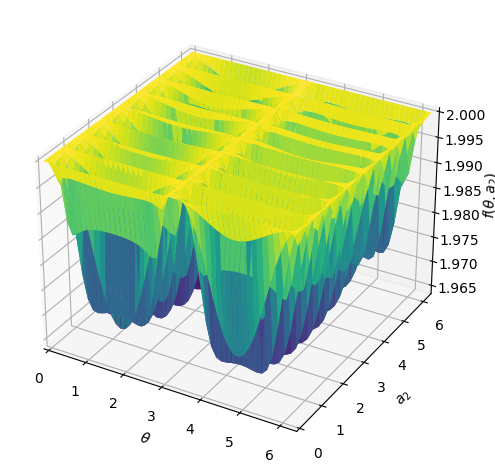

In [143]:
# fidelity vs parameters plot

plotting.plot3d(F,(theta,0,2*pi),(a2,0,2*pi))